In [ ]:
!git clone https://github.com/islab-ai/AITutorial.git

Cloning into 'AITutorial'...
remote: Enumerating objects: 173, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 173 (delta 47), reused 134 (delta 18), pack-reused 0
Receiving objects: 100% (173/173), 17.30 MiB | 12.46 MiB/s, done.
Resolving deltas: 100% (47/47), done.


## 1. 라이브러리 import

In [ ]:
import numpy as np # 행렬/다차원배열 처리하는데 사용
import pandas as pd # 데이터 조작 및 분석에 사용
import matplotlib.pyplot as plt # 데이터를 plotting 하는데 사용

# keras : tensorflow framework위에서 실행가능한 오픈소스 신경망 라이브러리
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.layers.recurrent import LSTM
from keras.models import Sequential

## pandas 이해하기

```bash
pandas에서 사용하는 데이터 형태 : 시리즈와 데이터프레임

1. 시리즈 : 1차원 배열 == 벡터
    - 구성 : 인덱스 & value
    - 구현 : pd.Series(데이터)
2. 데이터프레임 : 2차원 배열 == 행렬
    - 구성 : 인덱스 & column & value
    - 구현 : pd.DataFrame(데이터)
```

시리즈(Series)
- 시리즈는 index와 value로 구성된다.

In [ ]:
se = pd.Series(["인적사항","185cm","74kg","A형"])
se

0     인적사항
1    185cm
2     74kg
3       A형
dtype: object

In [ ]:
se.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
se.values

array(['인적사항', '185cm', '74kg', 'A형'], dtype=object)

In [ ]:
se.index = ["구분","키","체중","혈액형"]
se

구분      인적사항
키      185cm
체중      74kg
혈액형       A형
dtype: object

In [ ]:
se = se.reset_index()
se

,index,0
0,구분,인적사항
1,키,185cm
2,체중,74kg
3,혈액형,A형


데이터프레임(DataFrame)

In [ ]:
df = pd.DataFrame({
    "년도" : [2018,2019,2020,2021,2022],
    "체중" : [70,74,78,84,88],
    "취미" : ["댄스","독서","골프","독서","필라테스"]
})

print("% 김호원 교수님 인적사항 %")
df

% 김호원 교수님 인적사항 %


,년도,체중,취미
0,2018,70,댄스
1,2019,74,독서
2,2020,78,골프
3,2021,84,독서
4,2022,88,필라테스


In [ ]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
df.columns

Index(['년도', '체중', '취미'], dtype='object')

In [ ]:
df.values

array([[2018, 70, '댄스'],
       [2019, 74, '독서'],
       [2020, 78, '골프'],
       [2021, 84, '독서'],
       [2022, 88, '필라테스']], dtype=object)

In [ ]:
df = df.set_index("년도")
df

,체중,취미
년도,,
2018,70,댄스
2019,74,독서
2020,78,골프
2021,84,독서
2022,88,필라테스


In [ ]:
df = df.reset_index()
df

,년도,체중,취미
0,2018,70,댄스
1,2019,74,독서
2,2020,78,골프
3,2021,84,독서
4,2022,88,필라테스


특정 행 가져오기

In [ ]:
df.loc[2018]

체중    70
취미    댄스
Name: 2018, dtype: object

특정 열(컬럼) 가져오기

In [ ]:
df["취미"]

년도
2018      댄스
2019      독서
2020      골프
2021      독서
2022    필라테스
Name: 취미, dtype: object

특정 위치값 가져오기

In [ ]:
df.iloc[0,0]

70

조건에 맞는 특정 열(컬럼) 가져오기

In [ ]:
df["취미"]=="독서"

년도
2018    False
2019     True
2020    False
2021     True
2022    False
Name: 취미, dtype: bool

In [ ]:
df[df["취미"]=="독서"]

,체중,취미
년도,,
2019,74,독서
2021,84,독서


---

## 2. 데이터셋 로드 및 전처리

#### 데이터세트확인

In [ ]:
import os

In [ ]:
print(os.getcwd())

/content


In [ ]:
prices_dataset = pd.read_csv("AITutorial/stocks/prices.csv",header=0)
prices_dataset

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [ ]:
yahoo = prices_dataset[prices_dataset["symbol"]=='YHOO']
yahoo

,date,symbol,open,close,low,high,volume
713,2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0
...,...,...,...,...,...,...,...
849257,2016-12-23,YHOO,38.459999,38.660000,38.369999,38.810001,3840100.0
849757,2016-12-27,YHOO,38.590000,38.919998,38.500000,39.070000,4240300.0
850257,2016-12-28,YHOO,39.119999,38.730000,38.709999,39.220001,4393500.0
850757,2016-12-29,YHOO,38.759998,38.639999,38.480000,38.930000,4170200.0


In [ ]:
ysp = yahoo['close'].values.astype('float32')
ysp = ysp.reshape(1762,1)
ysp.shape

(1762, 1)

데이터세트 분할하기

In [ ]:
train_size = int(len(ysp)*0.80)
test_size = len(ysp) - train_size
train, test = ysp[0:train_size,:], ysp[train_size:len(ysp),:]

train_ratio = round(len(train)/len(ysp),3)
test_ratio = round(len(test)/len(ysp),3)
print(f"Train set 비율 : {train_ratio}, Test set 비율 : {test_ratio}")

Train set 비율 : 0.8, Test set 비율 : 0.2


데이터세트 스케일링

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(train)

train = scaler.transform(train)
test = scaler.transform(test)

In [ ]:
def create_dataset(dataset, look_back=1):
	
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
  
	return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(1407, 1)
(1407,)
(351, 1)
(351,)


In [ ]:
samples = trainX.shape[0]
test_samples = testX.shape[0]
time_step = 1
features = 1

trainX = np.reshape(trainX,(samples,time_step,features))
testX = np.reshape(testX, (test_samples,time_step,features))
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(1407, 1, 1)
(1407,)
(351, 1, 1)
(351,)


## 3. 모델정의

In [ ]:
model = Sequential()

model.add(LSTM(50,return_sequences=True, input_shape=(time_step, features)))
model.add(Dropout(0.2))

model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='mse',optimizer='rmsprop')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 70,901
Trainable params: 70,901
Non-traina

## 4. 학습 및 예측

In [ ]:
model.fit(trainX,trainY,batch_size=128,epochs=10,validation_split=0.05)

Epoch 1/10
11/11 [==============================] - 7s 78ms/step - loss: 0.1354 - val_loss: 0.3054
Epoch 2/10
11/11 [==============================] - 0s 11ms/step - loss: 0.0730 - val_loss: 0.1451
Epoch 3/10
11/11 [==============================] - 0s 10ms/step - loss: 0.0415 - val_loss: 0.0661
Epoch 4/10
11/11 [==============================] - 0s 10ms/step - loss: 0.0307 - val_loss: 0.0458
Epoch 5/10
11/11 [==============================] - 0s 11ms/step - loss: 0.0213 - val_loss: 0.0281
Epoch 6/10
11/11 [==============================] - 0s 10ms/step - loss: 0.0114 - val_loss: 0.0074
Epoch 7/10
11/11 [==============================] - 0s 11ms/step - loss: 0.0046 - val_loss: 0.0010
Epoch 8/10
11/11 [==============================] - 0s 11ms/step - loss: 0.0023 - val_loss: 4.7649e-04
Epoch 9/10
11/11 [==============================] - 0s 11ms/step - loss: 0.0017 - val_loss: 7.0901e-04
Epoch 10/10
11/11 [==============================] - 0s 10ms/step - loss: 0.0020 - val_loss: 8.7112e-

In [ ]:
pred = model.predict(testX)
pred = scaler.inverse_transform(pred.reshape(-1,1))
print(pred.shape)

testY = testY.reshape(-1,1)
testY = scaler.inverse_transform(testY.reshape(-1,1))
print(testY.shape)

(351, 1)
(351, 1)


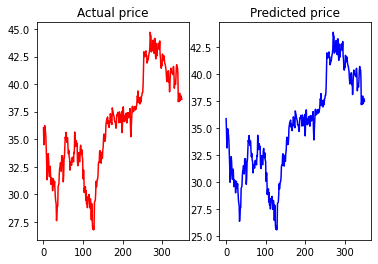

In [ ]:
plt.subplot(1,2,1)
plt.title("Actual price")
plt.plot(testY,'r')

plt.subplot(1,2,2)
plt.title("Predicted price")
plt.plot(pred,'b')
plt.show()

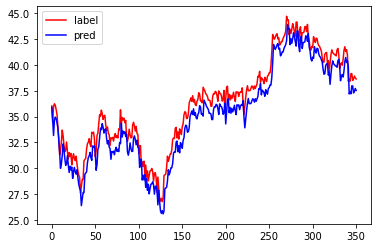

In [ ]:
plt.plot(testY,'r',label='label')
plt.plot(pred,'b',label='pred')
plt.legend()
plt.show()

# 삼성전자 주식보기

In [ ]:
!pip install finance-datareader

     |████████████████████████████████| 48 kB 2.7 MB/s 


In [ ]:
import FinanceDataReader as fdr

In [ ]:
samsung = fdr.DataReader('005930')

In [ ]:
samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-03-25,1379,1397,1370,1398,305340,NaN
1998-03-26,1388,1388,1341,1367,286220,-0.022175
1998-03-27,1367,1448,1323,1425,379830,0.042429
1998-03-28,1416,1432,1379,1380,118382,-0.031579
1998-03-30,1376,1376,1352,1360,168490,-0.014493
...,...,...,...,...,...,...
2022-05-13,65300,66700,65200,66500,14551536,0.024653
2022-05-16,67100,67400,66100,66300,11937555,-0.003008
2022-05-17,66600,67900,66600,67600,15680447,0.019608


In [ ]:
sam = samsung["Close"]
sam = sam[5000:]

sam = np.array(sam)
sam = sam.reshape(-1,1)
sam.shape

(1000, 1)

In [ ]:
train_size = int(len(sam)*0.80)
test_size = len(sam) - train_size
train, test = sam[0:train_size,:], sam[train_size:len(sam),:]

train_ratio = round(len(train)/len(sam),3)
test_ratio = round(len(test)/len(sam),3)
print(f"Train set 비율 : {train_ratio}, Test set 비율 : {test_ratio}")

Train set 비율 : 0.8, Test set 비율 : 0.2


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(train)

train = scaler.transform(train)
test = scaler.transform(test)

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(798, 1)
(798,)
(198, 1)
(198,)


In [ ]:
samples = trainX.shape[0]
test_samples = testX.shape[0]
time_step = 1
features = 1

trainX = np.reshape(trainX,(samples,time_step,features))
testX = np.reshape(testX, (test_samples,time_step,features))
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(798, 1, 1)
(798,)
(198, 1, 1)
(198,)


In [ ]:
model.fit(trainX,trainY,batch_size=128,epochs=10,validation_split=0.05)

Epoch 1/10
6/6 [==============================] - 0s 42ms/step - loss: 0.0017 - val_loss: 2.2305e-04
Epoch 2/10
6/6 [==============================] - 0s 13ms/step - loss: 0.0017 - val_loss: 3.2099e-04
Epoch 3/10
6/6 [==============================] - 0s 14ms/step - loss: 0.0016 - val_loss: 4.1637e-04
Epoch 4/10
6/6 [==============================] - 0s 26ms/step - loss: 0.0017 - val_loss: 4.6733e-04
Epoch 5/10
6/6 [==============================] - 0s 22ms/step - loss: 0.0017 - val_loss: 6.5237e-04
Epoch 6/10
6/6 [==============================] - 0s 26ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 7/10
6/6 [==============================] - 0s 27ms/step - loss: 0.0017 - val_loss: 1.6312e-04
Epoch 8/10
6/6 [==============================] - 0s 24ms/step - loss: 0.0021 - val_loss: 4.6906e-04
Epoch 9/10
6/6 [==============================] - 0s 26ms/step - loss: 0.0017 - val_loss: 4.0179e-04
Epoch 10/10
6/6 [==============================] - 0s 25ms/step - loss: 0.0015 - val_loss: 1.77

In [ ]:
pred = model.predict(testX)
pred = scaler.inverse_transform(pred.reshape(-1,1))
print(pred.shape)

testY = testY.reshape(-1,1)
testY = scaler.inverse_transform(testY.reshape(-1,1))
print(testY.shape)

(198, 1)
(198, 1)


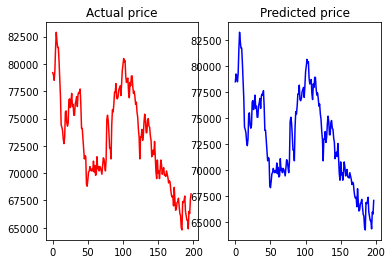

In [ ]:
plt.subplot(1,2,1)
plt.title("Actual price")
plt.plot(testY,'r')

plt.subplot(1,2,2)
plt.title("Predicted price")
plt.plot(pred,'b')
plt.show()

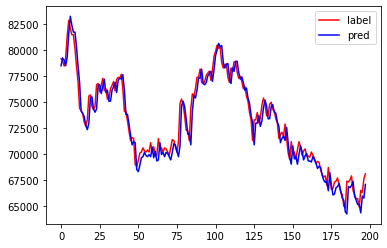

In [ ]:
plt.plot(testY,'r',label='label')
plt.plot(pred,'b',label='pred')
plt.legend()
plt.show()

그래서 내일 삼성전자 주식 물타기해야하나?

In [ ]:
test2 = samsung.iloc[-1,3]
test2

67300

In [ ]:
test2 = np.array(test2)
test2 = test2.reshape(-1,1)
print(test2.shape)

test2 = scaler.transform(test2)
print(test2)

(1, 1)
[[0.55742297]]


아직 사면 안되는구나..

In [ ]:
pred = model.predict(test2)
pred = scaler.inverse_transform(pred.reshape(-1,1))
print(pred)

[[66769.39]]


---

# <참고>

## 5. 예측 및 테스트

In [ ]:
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        predicted_price = model.predict(curr_frame[np.newaxis,:,:])
        predicted.append(predicted_price[0][0])

        curr_frame = predicted_price        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

predict_length=5
predictions = predict_sequences_multiple(model, testX[3], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))

[[36.21436 ]
 [36.515213]
 [36.83414 ]
 [37.172916]
 [37.533558]]


In [ ]:
predicted_price = scaler.inverse_transform(np.array(predictions).reshape(-1,1))
true_price = scaler.inverse_transform(testY[3:3+predict_length].reshape(-1,1))

In [ ]:
for i, [pred,true] in enumerate(zip(predicted_price,true_price)):
    print(f"{i+1}일 후, 실제 주식가격 : {true}, 예측 주식 가격 : {pred}")

1일 후, 실제 주식가격 : [36.24], 예측 주식 가격 : [36.21436]
2일 후, 실제 주식가격 : [36.1], 예측 주식 가격 : [36.515213]
3일 후, 실제 주식가격 : [35.69], 예측 주식 가격 : [36.83414]
4일 후, 실제 주식가격 : [35.19], 예측 주식 가격 : [37.172916]
5일 후, 실제 주식가격 : [34.1], 예측 주식 가격 : [37.533558]
